# Predicting Engagement - What drives ad performance?
## 1. Load data
## 2. Cleaning data
## 3. Encode data
## 4. DecesesionTree Model

### 1. Load data


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

filename ="https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/bank-full.csv"
bank = pd.read_csv(filename, sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Let's see a summary of our data frame
print("Row     : ", bank.shape[0])
print("Columns : ", bank.shape[1])
print("\nFeatures : \n", bank.columns.tolist())
print("\nMissing values : ", bank.isnull().sum().values.sum())
print("\nUnique values : ", bank.nunique())

Row     :  45211
Columns :  17

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Missing values :  0

Unique values :  age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [4]:
bank.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Here we use the apply funtion to transform 'y' from yes or no to 0s and 1s
bank['converted'] = bank['y'].apply(lambda x: 0 if x == 'no' else 1)
del bank['y']
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


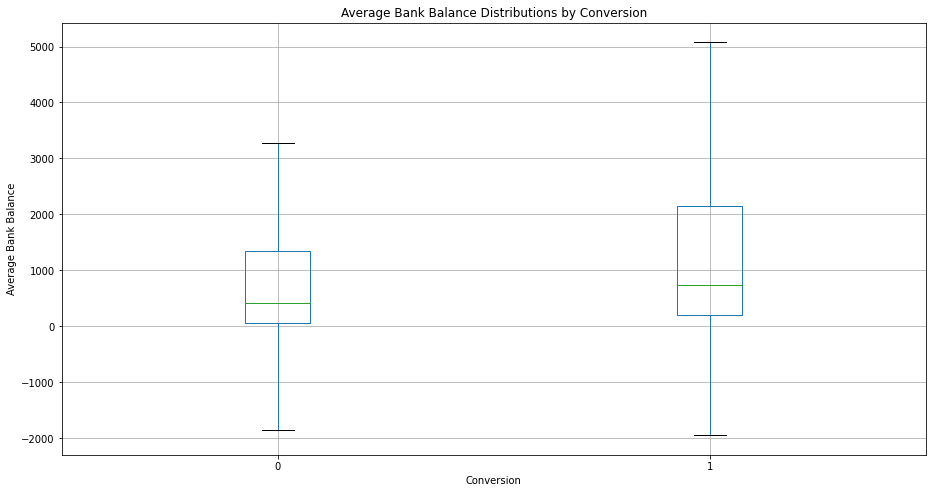

In [7]:
# Let's Visualize how our ouput variable (converted) change with different income
ax = bank[['converted', 'balance']].boxplot(by='converted', showfliers=False, figsize=(15,8))

ax.set_xlabel("Conversion")
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


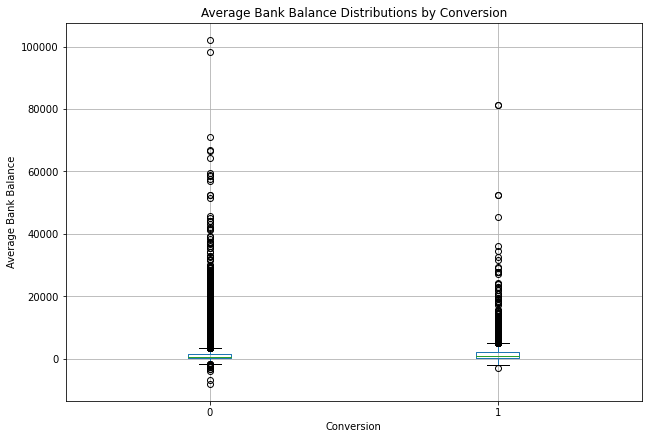

In [8]:
# Let's Visualize how our output variable (converted) changes with different incomes
ax = bank[['converted', 'balance']].boxplot(by='converted', showfliers=True, figsize=(10, 7))

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


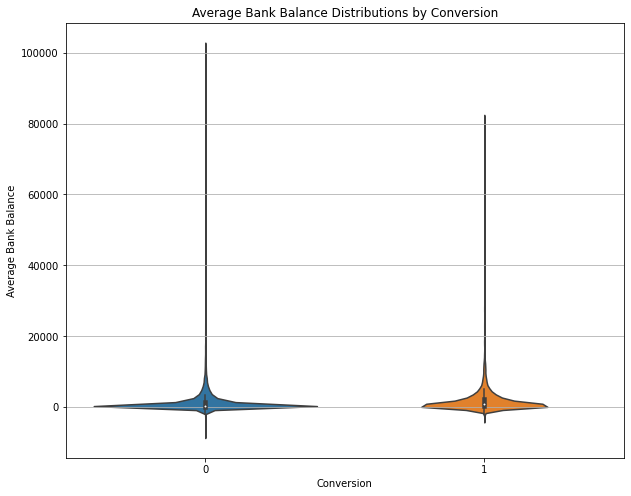

In [14]:
# Let's do the same withing using Violin plots
import seaborn as sns

fontsize = 10

fig, axes = plt.subplots()

fig.set_size_inches(10,8)
sns.violinplot('converted', 'balance', data= bank, ax=axes)
axes.set_title('Average Bank Balance Distributions by Conversion')

axes.yaxis.grid(True)
axes.set_xlabel('Conversion')
axes.set_ylabel('Average Bank Balance')
plt.show()

In [15]:
bank.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [16]:
# Conversion rate by campaign
conversions_by_contacts = bank.groupby('campaign')['converted'].sum()/bank.groupby('campaign') ['converted'].count()*100

conversions_by_contacts.head(10)

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
Name: converted, dtype: float64

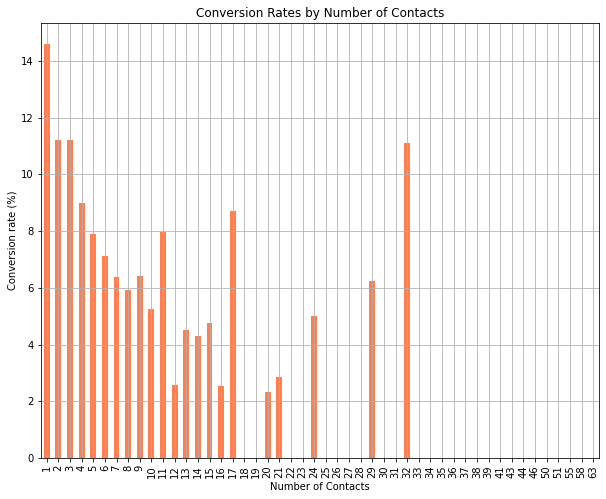

In [17]:
ax = conversions_by_contacts.plot.bar(figsize =(10,8), title="Conversion Rates by Number of Contacts", grid=True, color="coral")

ax.set_xlabel('Number of Contacts')
ax.set_ylabel("Conversion rate (%)")
plt.show()

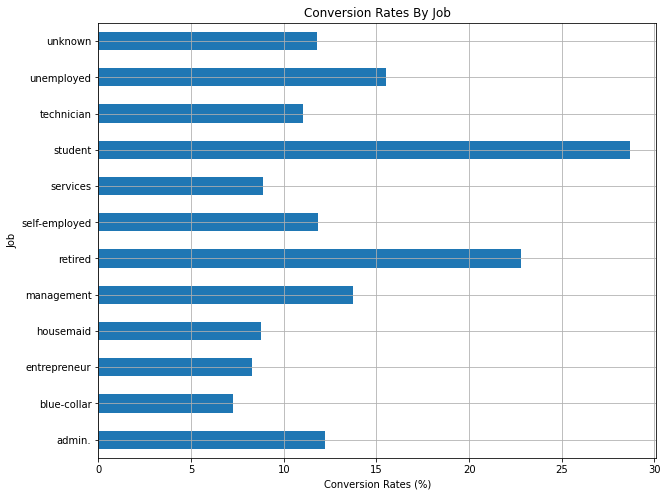

In [27]:
# How about conversion rate by job?
conversions_rate_by_job = bank.groupby('job')['converted'].sum()/bank.groupby('job')['converted'].count()*100
ax = conversions_rate_by_job.plot.barh(figsize=(10,8), grid=True, title='Conversion Rates By Job')
ax.set_xlabel('Conversion Rates (%)')
ax.set_ylabel('Job',rotation ='vertical')
plt.show()

In [28]:
# Get our category type columns
cols = bank.columns
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['loan',
 'job',
 'poutcome',
 'contact',
 'housing',
 'default',
 'education',
 'marital',
 'month']

## We need to encode our categoical variables'loan',
 'job', 'poutcome', 'contact', 'housing', 'default',
 'education', 'marital', 'month'

In [34]:
# Starting with month first
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [35]:
bank.groupby('month').count()['converted']

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: converted, dtype: int64

In [ ]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

bank['month'] = bank['month'].apply(lambda x: months.index(x)+1)

In [40]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [41]:
# Let's encode job
bank.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [42]:
bank = pd.get_dummies(data=bank, columns=['job'])

In [43]:
bank.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
# Let's encode marital
bank = pd.get_dummies(data=bank, columns=['marital'])

In [45]:
# Let's encode housing
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [46]:
bank['housing']= bank['housing'].map(lambda x: 0 if x == 'no' else 1)

In [47]:
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,1,no,unknown,5,5,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,1,no,unknown,5,5,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,1,yes,unknown,5,5,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,1,no,unknown,5,5,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,0,no,unknown,5,5,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [49]:
# Let's encode Loans
bank.loan.unique()

array(['no', 'yes'], dtype=object)

In [50]:
bank['loan'] = bank['loan'].map(lambda s :1  if s == 'yes' else 0)
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,1,0,unknown,5,5,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,1,1,unknown,5,5,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,0,0,unknown,5,5,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [51]:
# let's encode education
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [52]:
bank = pd.get_dummies(data=bank, columns=['education'])
bank.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,no,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,44,no,29,1,0,unknown,5,5,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,33,no,2,1,1,unknown,5,5,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,47,no,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,33,no,1,0,0,unknown,5,5,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [53]:
#default, , contact
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [54]:
bank = pd.get_dummies(data=bank, columns=['contact'])
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,no,2143,1,0,5,5,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,1,0,5,5,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,33,no,2,1,1,5,5,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,47,no,1506,1,0,5,5,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,33,no,1,0,0,5,5,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1


In [55]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [56]:
bank = pd.get_dummies(data=bank, columns=['default'])
bank.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes
0,58,2143,1,0,5,5,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
1,44,29,1,0,5,5,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
2,33,2,1,1,5,5,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,47,1506,1,0,5,5,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
4,33,1,0,0,5,5,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0


In [57]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [58]:
bank = pd.get_dummies(data=bank, columns=['poutcome'])
bank.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1,44,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1
2,33,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1
3,47,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1
4,33,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1


In [59]:
# What categoric columns are left?
cols = bank.columns
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

[]

In [60]:
# Prepare data for ML model
Y_train = bank.converted
X_train = bank.drop(labels=['converted'], axis=1)
X_train


,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1,44,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1
2,33,2,1,1,5,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1
3,47,1506,1,0,5,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1
4,33,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,0,17,11,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
45207,71,1729,0,0,17,11,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
45208,72,5715,0,0,17,11,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
45209,57,668,0,0,17,11,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1


## Now let's fit our Decision Tree Model

In [61]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)

In [62]:
clf.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
!pip install graphviz

In [64]:
features = list(X_train.columns)
response_var = 'converted'

### Generate and Visualize Our Decision Tree

In [67]:
import graphviz

# We export our tree to a DOT format is a graphic description language
dot_data = tree.export_graphviz(clf, feature_names=features, class_names=['0','1'],
                                filled=True, rounded=True, special_characters=True)
# Create a visual graph of our tree
graph = graphviz.Source(dot_data)

#### Understanding our tree
- The first line contains split threshold
- The second line is the Gini impurity which is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly  labeled  according to the class distribution in the dataset
- The third line gives us the total number of records that belong to that node
- The fourth line in each mode gives us the composition of the records in two different classes.
- The fifth line is the class prediction (only use as a predictor when looking at the bottom nodes or root nodes)

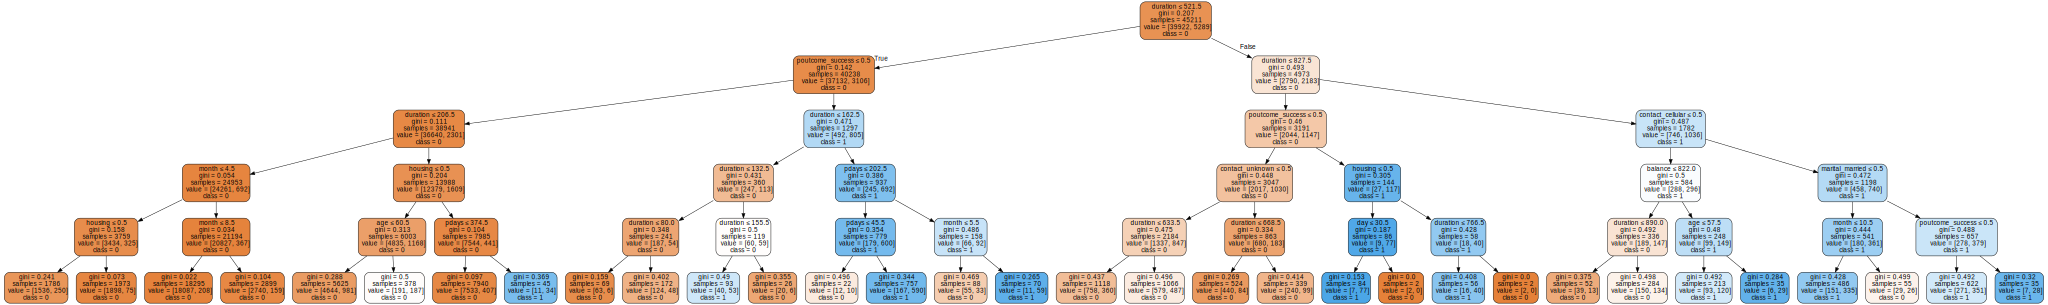

In [68]:
# Display our tree below
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

graph